# Adam Optimization

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import tensorflow as tf

## Exponential weighted average

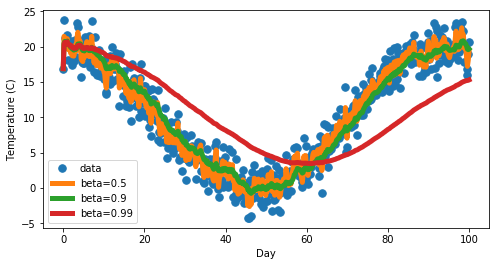

In [154]:
n = 500
t = np.linspace(0,100,n)
y = 10*np.cos(t/15) + 10 + 2*np.random.randn(n)

plt.figure(figsize=(8,4))
plt.plot(t,y,'.',markersize=15)
plt.xlabel('Day')
plt.ylabel('Temperature (C)')

def exp_weight_avg(y,beta=0.9):
    y_avg = np.zeros(n)
    scaler = np.zeros(n) # this is for bias correction for early stage of data
    y0=0
    for i in range(n):
        y_avg[i] = (beta*y0 + (1-beta)*y[i])
        scaler[i] = 1-beta**(i+1)
        y0=y_avg[i]
    y_avg = y_avg/scaler
    return y_avg

y_avg = exp_weight_avg(y,beta=0.5)
plt.plot(t,y_avg,'-',linewidth=5)

y_avg = exp_weight_avg(y,beta=0.9)
plt.plot(t,y_avg,'-',linewidth=5)

y_avg = exp_weight_avg(y,beta=0.99)
plt.plot(t,y_avg,'-',linewidth=5)

plt.legend(('data','beta=0.5','beta=0.9','beta=0.99'))
plt.show()

## Example - linear regression

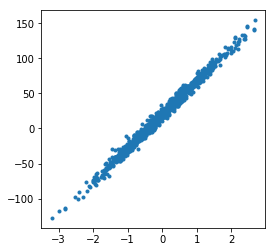

In [141]:
m = 1000
X,y,_ = make_regression(n_samples=m, n_features=1, n_informative=1, n_targets=1,
                        bias=20, noise=5, coef=0.2, random_state=10)
X = X.T
Y = y.reshape(1,-1)

plt.figure(figsize=(4,4))
plt.plot(X.T,Y.T,'.')
plt.show()

In [142]:
# build up tensor flow model
tf.reset_default_graph()

X_input = tf.placeholder(tf.float32,shape=(1,None),name='X')
Y_input = tf.placeholder(tf.float32,shape=(1,None),name='Y')

w_input = tf.placeholder(tf.float32,shape=(),name='X')
b_input = tf.placeholder(tf.float32,shape=(),name='X')

Y_pred = w_input*X_input + b_input

cost = tf.reduce_mean(tf.keras.losses.MSE(y_true=Y_input,y_pred=Y_pred))

nw = 100
nb = 100
w_vector = np.linspace(0,100,nw)
b_vector = np.linspace(0,40,nb)
cost_mat = np.zeros([nw,nb])
with tf.Session() as sess:
    for i in range(nw):      
        for j in range(nb):      
            cost_mat[i,j] = sess.run(cost,feed_dict={X_input:X,Y_input:Y,w_input:w_vector[i],b_input:b_vector[j]})

In [143]:
# build up tensor flow model
tf.reset_default_graph()

X_input = tf.placeholder(tf.float32,shape=(1,None))
Y_input = tf.placeholder(tf.float32,shape=(1,None))

w = tf.get_variable('w',shape=[1,1],initializer=tf.constant_initializer(2))
b = tf.get_variable('b',shape=[1,1],initializer=tf.constant_initializer(15))

Y_pred = w*X_input + b

cost = tf.reduce_mean(tf.keras.losses.MSE(y_true=Y_input,y_pred=Y_pred))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(cost)

optimizer_adam = tf.train.AdamOptimizer(learning_rate = 1).minimize(cost)
# Adam needs bigger learning rate!

In [144]:
# batch gradient descent
iteration_num = 20
w_batch = np.zeros(iteration_num)
b_batch = np.zeros(iteration_num)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(iteration_num):
        sess.run(optimizer,feed_dict={X_input:X,Y_input:Y})
        cost_value = sess.run(cost,feed_dict={X_input:X,Y_input:Y})
        
        if i%1 == 0:
            w_batch[i] = sess.run(w)
            b_batch[i] = sess.run(b)
            print('cost after {} iterations: {}'.format(i,cost_value))

cost after 0 iterations: 1567.8685302734375
cost after 1 iterations: 1308.614990234375
cost after 2 iterations: 1092.8997802734375
cost after 3 iterations: 913.4107666015625
cost after 4 iterations: 764.0645141601562
cost after 5 iterations: 639.7987670898438
cost after 6 iterations: 536.40185546875
cost after 7 iterations: 450.36895751953125
cost after 8 iterations: 378.78411865234375
cost after 9 iterations: 319.22088623046875
cost after 10 iterations: 269.6604919433594
cost after 11 iterations: 228.42306518554688
cost after 12 iterations: 194.11077880859375
cost after 13 iterations: 165.56088256835938
cost after 14 iterations: 141.805419921875
cost after 15 iterations: 122.03941345214844
cost after 16 iterations: 105.5927963256836
cost after 17 iterations: 91.90818786621094
cost after 18 iterations: 80.52169036865234
cost after 19 iterations: 71.04737854003906


In [146]:
# mini-batch
epoch_num = 100
batch_size = 16
w_minibatch = np.zeros(epoch_num)
b_minibatch = np.zeros(epoch_num)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(epoch_num):
        idx = np.random.choice(m, batch_size, replace=False)
        X_batch = np.array([X[0,idx]])
        Y_batch = np.array([Y[0,idx]])
        
        sess.run(optimizer,feed_dict={X_input:X_batch,Y_input:Y_batch})
        cost_value = sess.run(cost,feed_dict={X_input:X,Y_input:Y})
        
        w_minibatch[i] = sess.run(w)
        b_minibatch[i] = sess.run(b)  

In [151]:
# stochastic gradient descent
epoch_num = 100
batch_size = 1

w_stochastic = np.zeros(epoch_num)
b_stochastic = np.zeros(epoch_num)
w_adam_stochastic = np.zeros(epoch_num)
b_adam_stochastic = np.zeros(epoch_num)

np.random.seed(2)
mini_batchs = np.random.choice(m, epoch_num , replace=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(epoch_num):
        idx = mini_batchs[i]
        X_batch = np.array([[X[0,idx]]])
        Y_batch = np.array([[Y[0,idx]]])
        
        sess.run(optimizer,feed_dict={X_input:X_batch,Y_input:Y_batch})
        w_stochastic[i] = sess.run(w)
        b_stochastic[i] = sess.run(b)
        
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(epoch_num):
        idx = mini_batchs[i]
        X_batch = np.array([[X[0,idx]]])
        Y_batch = np.array([[Y[0,idx]]])
        
        sess.run(optimizer_adam,feed_dict={X_input:X_batch,Y_input:Y_batch})
        w_adam_stochastic[i] = sess.run(w)
        b_adam_stochastic[i] = sess.run(b)       

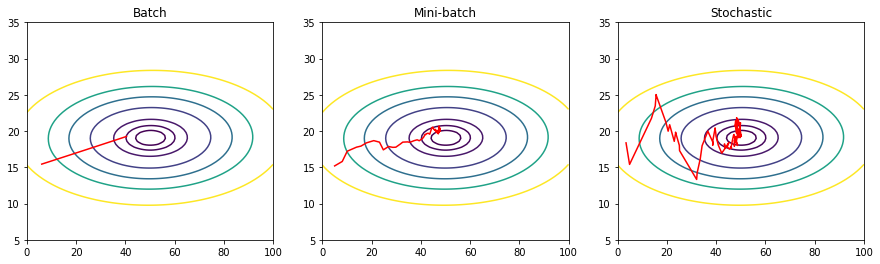

In [152]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.contour(w_vector,b_vector,cost_mat,np.array([30,40,60,120,200,300,500]))
plt.plot(w_batch,b_batch,'r-',markersize=10)
plt.title('Batch')
plt.ylim([5,35])
plt.subplot(1,3,2)
plt.contour(w_vector,b_vector,cost_mat,np.array([30,40,60,120,200,300,500]))
plt.plot(w_minibatch,b_minibatch,'r-',markersize=10)
plt.title('Mini-batch')
plt.ylim([5,35])
plt.subplot(1,3,3)
plt.contour(w_vector,b_vector,cost_mat,np.array([30,40,60,120,200,300,500]))
plt.plot(w_stochastic,b_stochastic,'r-',markersize=10)
plt.title('Stochastic')
plt.ylim([5,35])
plt.show()

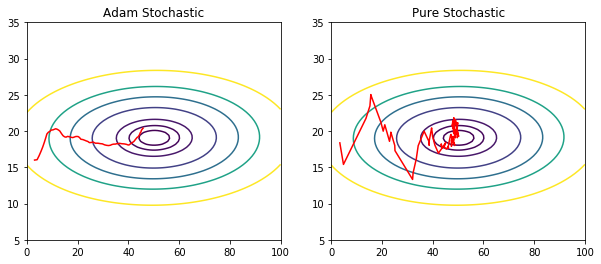

In [153]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.contour(w_vector,b_vector,cost_mat,np.array([30,40,60,120,200,300,500]))
plt.plot(w_adam_stochastic,b_adam_stochastic,'r-',markersize=10)
plt.title('Adam Stochastic')
plt.ylim([5,35])
plt.subplot(1,2,2)
plt.contour(w_vector,b_vector,cost_mat,np.array([30,40,60,120,200,300,500]))
plt.plot(w_stochastic,b_stochastic,'r-',markersize=10)
plt.title('Pure Stochastic')
plt.ylim([5,35])
plt.show()